# Выбор локации для скважины

Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(df1.head())
display(df2.head())
display(df3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
display(df1.info())
display(df2.info())
display(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display(df1.describe())
display(df2.describe())
display(df3.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [6]:
display(df2.duplicated().sum())
display(df1.duplicated().sum())
display(df3.duplicated().sum())

0

0

0

In [7]:
#Отбросим столбцы с идентификацией скважины, как ненужные.
df1, df2, df3 = df1.drop('id', axis=1), df2.drop('id', axis=1), df3.drop('id', axis=1)

**Пропусков и дубликатов в данных нет, распределены нормально, делим на выборки и масштабируем**

In [8]:
target_1 = df1['product']
features_1 = df1.drop('product', axis=1)
target_2 = df2['product']
features_2 = df2.drop('product', axis=1)
target_3 = df3['product']
features_3 = df3.drop('product', axis=1)
features_train_1, features_valid_1, target_train_1, target_valid_1 =\
    train_test_split(features_1, target_1, test_size=.25, random_state=12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 =\
    train_test_split(features_2, target_2, test_size=.25, random_state=12345)
features_train_3, features_valid_3, target_train_3, target_valid_3 =\
    train_test_split(features_3, target_3, test_size=.25, random_state=12345)

In [9]:
#pd.options.mode.chained_assignment = None
#scaler = StandardScaler()
#scaler.fit(features_train_1)
#features_train_1 = scaler.transform(features_train_1)
#features_valid_1 = scaler.transform(features_valid_1)
#scaler.fit(features_train_2)
#features_train_2 = scaler.transform(features_train_2)
#features_valid_2 = scaler.transform(features_valid_2)
#scaler.fit(features_train_3)
#features_train_3 = scaler.transform(features_train_3)
#features_valid_3 = scaler.transform(features_valid_3)

## Обучение и проверка модели

In [11]:
#Создадим функцию для обучения и проверки модели.
def fit_model(features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print(f'Средний предсказанный запас сырья: {predictions_valid.mean():.2f} тыс.баррелей.')
    print(f'Средний фактический запас сырья: {target_valid.mean():.2f} тыс.баррелей.')
    RMSE_1 = mean_squared_error(target_valid, predictions_valid) ** .5
    print(f'RMSE равна {RMSE_1:.2f}')
    return predictions_valid

In [12]:
predictions_valid_1 = fit_model(features_train_1, target_train_1, features_valid_1, target_valid_1)

Средний предсказанный запас сырья: 92.59 тыс.баррелей.
Средний фактический запас сырья: 92.08 тыс.баррелей.
RMSE равна 37.58


In [13]:
predictions_valid_2 = fit_model(features_train_2, target_train_2, features_valid_2, target_valid_2)

Средний предсказанный запас сырья: 68.73 тыс.баррелей.
Средний фактический запас сырья: 68.72 тыс.баррелей.
RMSE равна 0.89


In [14]:
predictions_valid_3 = fit_model(features_train_3, target_train_3, features_valid_3, target_valid_3)

Средний предсказанный запас сырья: 94.97 тыс.баррелей.
Средний фактический запас сырья: 94.88 тыс.баррелей.
RMSE равна 40.03


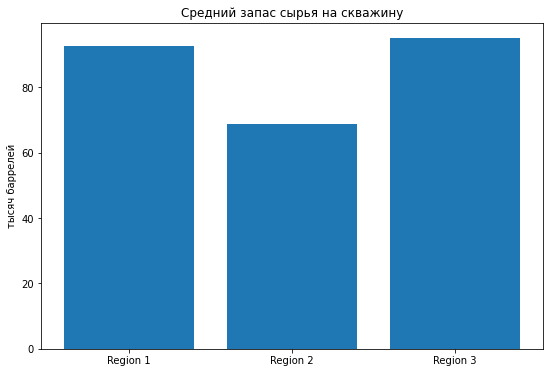

In [15]:
fig, ax = plt.subplots(figsize= (9,6))
labels = ['Region 1', 'Region 2', 'Region 3']
ax.bar(labels, [predictions_valid_1.mean(), predictions_valid_2.mean(), predictions_valid_3.mean()])
ax.set_title('Средний запас сырья на скважину')
ax.set_ylabel('тысяч баррелей');

**Средний предсказанный запас сырья во всех трёт моделях почти не отличается от фактического. Однако средняя квадратичная ошибка достаточно велика в первой и третьей модели.**

## Подготовка к расчёту прибыли

In [17]:
#топ лучших для разработки скважин
OILWELL_QTY = 200
#бюджет на разработку
BUDGET = 10000000000
#цена 1 барреля
PRICE_PER_1000BARREL = 450000
print(f'Достаточный средний объем сырья на скважину {(BUDGET / (PRICE_PER_1000BARREL * OILWELL_QTY)):.2f} тысяч баррелей')

Достаточный средний объем сырья на скважину 111.11 тысяч баррелей


**Минимальное среднее количество продукта на двести лучших скважин должно соответствовать 111 тысячам баррелей, что больше любого из общих средних запасов по скважинам по регионам. Неудивительно, для этого мы и выбираем лучшие скважины, а не тыкаем в любую**

In [19]:
def define_profit(target, predictions, count=oilwell_qty):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    #print(selected)
    return selected.sum() * price_per_1000barrel   

## Расчёт прибыли и рисков 

In [20]:
state = np.random.RandomState(12345)

def find_general_metrics(target, predictions):
    values = []
    for i in range(1000):
        target = target.reset_index(drop=True)
        target_subsample = target.sample(n=500, replace = True, random_state=state)
        predictions = pd.Series(predictions)
        predictions_subsample = predictions[target_subsample.index]
        values.append(define_profit(target_subsample, predictions_subsample))
    
    values = pd.Series(values)
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    deficit_rate = values[values < 10000000000].count() / values.count()
    
    mean = values.mean()
    print(f'Средняя выручка {mean/1000000000:.2f} млрд. руб')
    print(f'Доверительный интервал от {lower/1000000000:.2f} до {upper/1000000000:.2f} млрд. руб.')
    print(f'Вероятность убытков составляет {(deficit_rate * 100):.2f} %')

In [21]:
find_general_metrics(target_valid_1, predictions_valid_1)

Средняя выручка 10.43 млрд. руб
Доверительный интервал от 9.90 до 10.95 млрд. руб.
Вероятность убытков составляет 6.00 %


In [22]:
find_general_metrics(target_valid_2, predictions_valid_2)

Средняя выручка 10.52 млрд. руб
Доверительный интервал от 10.13 до 10.95 млрд. руб.
Вероятность убытков составляет 0.30 %


In [23]:
find_general_metrics(target_valid_3, predictions_valid_3)

Средняя выручка 10.42 млрд. руб
Доверительный интервал от 9.88 до 10.99 млрд. руб.
Вероятность убытков составляет 6.20 %


**Наиболее перспективный регион для разработки месторождения - регион номер 2, вероятность убытков составляет не более 1%, что нас устраивает в отличие от других регионов, где несмотря на возможность получения большей прибыли, риск уйти в убыток также велик.**